In [1]:
import pyoti.sparse as oti
import pyoti.core as coti
import numpy as np
import math

This implements a test for arbitrary order derivatives.

In [2]:
def fwdMode(X):
    return oti.cos( oti.sin( oti.log( np.sum(X)**5 ) ) )

def fwdMode(X):
    return cos( sin( log( np.sum(X)**5 ) ) )

def fwdRealMode(X):
    return math.cos(math.sin(math.log(np.sum(X)**5)))

def revMode(X):
    w1 = np.sum(X)
    w2 = (w1.real + oti.e(1,order=w1.order))**5
    w3 = oti.log(w2.real + oti.e(1,order=w2.order))
    w4 = oti.sin(w3.real + oti.e(1,order=w3.order))
    w5 = oti.cos(w4.real + oti.e(1,order=w4.order))

    res = w5.rom_eval_object([1],[w4-w4.real])
    res = res.rom_eval_object([1],[w3-w3.real])
    res = res.rom_eval_object([1],[w2-w2.real])
    res = res.rom_eval_object([1],[w1-w1.real])
    return res
    

In [35]:
nvars_max = 65000
nvars = 1
while True:

    X = [i+0.5 for i in range(1,nvars+1)]
    print('nvars=',nvars)
    %timeit fwdRealMode(X)
            
    nvars *= 2
    if nvars>nvars_max:
        break

nvars= 1
4.74 µs ± 11.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
nvars= 2
4.8 µs ± 7.79 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
nvars= 4
4.93 µs ± 26.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
nvars= 8
5.16 µs ± 15.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
nvars= 16
5.54 µs ± 11.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
nvars= 32
6.29 µs ± 35.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
nvars= 64
7.84 µs ± 23.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
nvars= 128
11 µs ± 5.69 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
nvars= 256
16.9 µs ± 28.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
nvars= 512
29.5 µs ± 577 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
nvars= 1024
56.6 µs ± 314 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
nvars= 2048
105 µs ± 325 ns per loop (mean ± std. dev. of 7 

In [43]:
for nvars in [10,100,1000,64999]:
    X = [i+0.5 for i in range(1,nvars+1)]
    print('\nnvars=',nvars)
    %timeit fwdRealMode(X)


nvars= 10
5.27 µs ± 15.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

nvars= 100
9.49 µs ± 40.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

nvars= 1000
55.3 µs ± 280 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

nvars= 64999
3.07 ms ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [2]:
realTimes=    {
        1:4.74,
        2:4.8,
        4:4.93,
        8:5.16,
        10:5.37,
        16:5.54,
        32:6.29,
        64:7.84,
        100:9.58,
        128:11,
        256:16.9,
        512:29.5,
        1000:55.3,
        1024:56.6,
        2048:105,
        4096:201,
        8192:395,
        16384:777,
        32768:1550,
        64999:3070,
    }

In [3]:
coti.print_capabilities()

 Order  Nbases    Ndir
     1   65000   65000
     2    1000  500500
     3     100  171700
     4     100 4421275
     5      10    2002
     6      10    5005
     7      10   11440
     8      10   24310
     9      10   48620
    10      10   92378
    11       5    1365
    12       5    1820
    13       5    2380
    14       5    3060
    15       5    3876
    16       5    4845
    17       5    5985
    18       5    7315
    19       5    8855
    20       5   10626
    21       3     253
    22       3     276
    23       3     300
    24       3     325
    25       3     351
    26       3     378
    27       3     406
    28       3     435
    29       3     465
    30       3     496
    31       3     528
    32       3     561
    33       3     595
    34       3     630
    35       3     666
    36       3     703
    37       3     741
    38       3     780
    39       3     820
    40       3     861
    41       3     903
    42       3     946
    43     

In [4]:
order = 2
nvars = 4
X = [i+0.5+oti.e(i,order=order) for i in range(1,nvars+1)]
nvars

4

In [73]:
%timeit fwdMode(X)

12.3 µs ± 39.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
12.3 µs ± 39.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [74]:
%timeit revMode(X)

26.7 µs ± 102 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
26.7 µs ± 102 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [6]:
# orders = [1,2,4,6,8,10]
# nvars_lims = [65000,1000,100,10,10,10]
orders = [2,4,6,8,10]
nvars_lims = [1000,100,10,10,10]
# orders =[ 2]
# nvars_lims = [4]
i=0
pre=' '
for ordi in orders:
    print('*'*100)
    print('Order:',ordi)
    nvars = nvars_lims[i]
    nvari = 1
    while nvari < nvars:
        print(pre*4+'*'*80)
        print(pre*4+'nvars:',nvari)
        X = [i+0.5+oti.e(i,order=ordi) for i in range(1,nvari+1)]

        print(pre*4+'Forward-')
        %timeit fwdMode(X)
        
        print(pre*4+'Reverse-')
        %timeit revMode(X)
        nvari *= 2

    nvari = nvars
    print(pre*4+'*'*80)
    print(pre*4+'nvars:',nvari)
    X = [i+0.5+oti.e(i,order=ordi) for i in range(1,nvari+1)]

    print(pre*4+'Forward-')
    %timeit fwdMode(X)

    print(pre*4+'Reverse-')
    %timeit revMode(X)

    i+=1

****************************************************************************************************
Order: 2
    ********************************************************************************
    nvars: 1
    Forward-
7.63 µs ± 38.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
    Reverse-
22.4 µs ± 46.2 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
    ********************************************************************************
    nvars: 2
    Forward-
9.22 µs ± 13.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
    Reverse-
23.6 µs ± 62.4 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
    ********************************************************************************
    nvars: 4
    Forward-
12.3 µs ± 83.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
    Reverse-
26.1 µs ± 34.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
    *************************************************************

1.44 ms ± 2.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
****************************************************************************************************
Order: 10
    ********************************************************************************
    nvars: 1
    Forward-
58.4 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
    Reverse-
307 µs ± 3.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
    ********************************************************************************
    nvars: 2
    Forward-
92.2 µs ± 60.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
    Reverse-
310 µs ± 173 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
    ********************************************************************************
    nvars: 4
    Forward-
2.17 ms ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
    Reverse-
341 µs ± 445 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
    ***

In [3]:
# First order then nvars. Values in us (microseconds).
fwd = {
        1:
            {
                1:6.65,
                2:8.11,
                4:10.6,
                8:15.5,
                16:25.6,
                32:46.6,
                64:89.3,
                128:179,
                256:366,
                512:803,
                1024:1930,
                2048:5160.,
                4096:16100,
                8192:57600,
                16384:211000,
                32768:808000,
                64999:3100000
            },
        2:
            {
                1:7.63,
                2:9.16,
                4:12.3,
                8:18.7,
                16:37.5,
                32:114,
                64:543,
                128:3710,
                256:27800,
                512:219000,
                1000:1620000,
            },
        4:
            {
                1:11.7,
                2:15.4,
                4:26.4,
                8:174,
                16:4510,
                32:188000,
                64:9830000,
                100:134000000,
            },
        6:
            {
                1: 18.6,
                2: 25.6,
                4: 111,
                8: 4570,
                10: 21100,
            },
        8:
            {
                1: 32.1,
                2: 49.3,
                4: 547,
                8: 86900,
                10: 533000,
            },
        10:
            {
                1: 58.4,
                2: 92.2,
                4: 2170,
                8: 892000,
                10: 8070000,
            },
      }





rev = {
        1:
            {
                1:18.2,
                2:19.7,
                4:22,
                8:27.3,
                16:37.2,
                32:58.3,
                64:101,
                128:191,
                256:378,
                512:820,
                1024:1930,
                2048:5150,
                4096:16200,
                8192:57700,
                16384:214000,
                32768:808000,
                64999:3110000,
            },
        2:
            {
                1:22.8,
                2:23.8,
                4:26.1,
                8:31.6,
                16:44.1,
                32:78,
                64:212,
                128:1050,
                256:7120,
                512:54500,
                1000:403000,
            },
        4:
            {
                1:37.7,
                2:39.7,
                4:43.4,
                8:55.9,
                16:188,
                32:2540,
                64:59700,
                100:496000,
            },
        6:
            {
                1: 74.8,
                2: 77.2,
                4: 85.3,
                8: 151,
                10: 279,
            },
        8:
            {
                1: 170,
                2: 168,
                4: 176,
                8: 505,
                10: 1440,
            },
        10:
            {
                1: 307,
                2: 310,
                4: 341,
                8: 1680,
                10: 6530,
            },
      }




In [12]:
# revMode(X)

In [15]:
for ordi in fwd.items
fwd[1]

{1: 6.65,
 2: 8.11,
 4: 10.6,
 8: 15.5,
 16: 25.6,
 32: 46.6,
 64: 89.3,
 128: 179,
 256: 366,
 512: 803,
 1024: 1930,
 2048: 5160.0,
 4096: 16100,
 8192: 57600,
 16384: 211000,
 32768: 808000,
 64999: 3100000}

In [4]:
# Get reference values:
orders_evald = []
cputimes_evald = []
rel_cputimes_evald = []
for ordi,ordi_times in fwd.items():
    print(ordi,)
    orders_evald.append(ordi)
    
    cputimes_evald.append([
        list(ordi_times.keys()),
        np.array(list(ordi_times.values()))
    ])
    rel_cputimes_evald.append([
        list(ordi_times.keys()),
        np.array(list(ordi_times.values()))
    ])
i=0
for ordi,ordi_times in rev.items():
    print(ordi)
    cputimes_evald[i].append(np.array(list(ordi_times.values())) )
    rel_cputimes_evald[i].append(np.array(list(ordi_times.values())) )
    i+=1
cputimes_evald

1
2
4
6
8
10
1
2
4
6
8
10


[[[1,
   2,
   4,
   8,
   16,
   32,
   64,
   128,
   256,
   512,
   1024,
   2048,
   4096,
   8192,
   16384,
   32768,
   64999],
  array([6.65e+00, 8.11e+00, 1.06e+01, 1.55e+01, 2.56e+01, 4.66e+01,
         8.93e+01, 1.79e+02, 3.66e+02, 8.03e+02, 1.93e+03, 5.16e+03,
         1.61e+04, 5.76e+04, 2.11e+05, 8.08e+05, 3.10e+06]),
  array([1.82e+01, 1.97e+01, 2.20e+01, 2.73e+01, 3.72e+01, 5.83e+01,
         1.01e+02, 1.91e+02, 3.78e+02, 8.20e+02, 1.93e+03, 5.15e+03,
         1.62e+04, 5.77e+04, 2.14e+05, 8.08e+05, 3.11e+06])],
 [[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1000],
  array([7.63e+00, 9.16e+00, 1.23e+01, 1.87e+01, 3.75e+01, 1.14e+02,
         5.43e+02, 3.71e+03, 2.78e+04, 2.19e+05, 1.62e+06]),
  array([2.28e+01, 2.38e+01, 2.61e+01, 3.16e+01, 4.41e+01, 7.80e+01,
         2.12e+02, 1.05e+03, 7.12e+03, 5.45e+04, 4.03e+05])],
 [[1, 2, 4, 8, 16, 32, 64, 100],
  array([1.17e+01, 1.54e+01, 2.64e+01, 1.74e+02, 4.51e+03, 1.88e+05,
         9.83e+06, 1.34e+08]),
  array([3.77e+01, 3.9

In [5]:
for i in range(len(cputimes_evald)):
    for k in range(len(cputimes_evald[i][0])):
            nvars = cputimes_evald[i][0][k]
            rel_cputimes_evald[i][1][k] = cputimes_evald[i][1][k]/realTimes[nvars]
            rel_cputimes_evald[i][2][k] = cputimes_evald[i][2][k]/realTimes[nvars]

In [42]:
realTimes

{1: 4.74,
 2: 4.8,
 4: 4.93,
 8: 5.16,
 10: 5.37,
 16: 5.54,
 32: 6.29,
 64: 7.84,
 100: 9.58,
 128: 11,
 256: 16.9,
 512: 29.5,
 1024: 56.6,
 2048: 105,
 4096: 201,
 8192: 395,
 16384: 777,
 32768: 1550,
 64999: 3070}

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt


In [98]:
coti.ndir_total(11,8)

75582

<IPython.core.display.Javascript object>


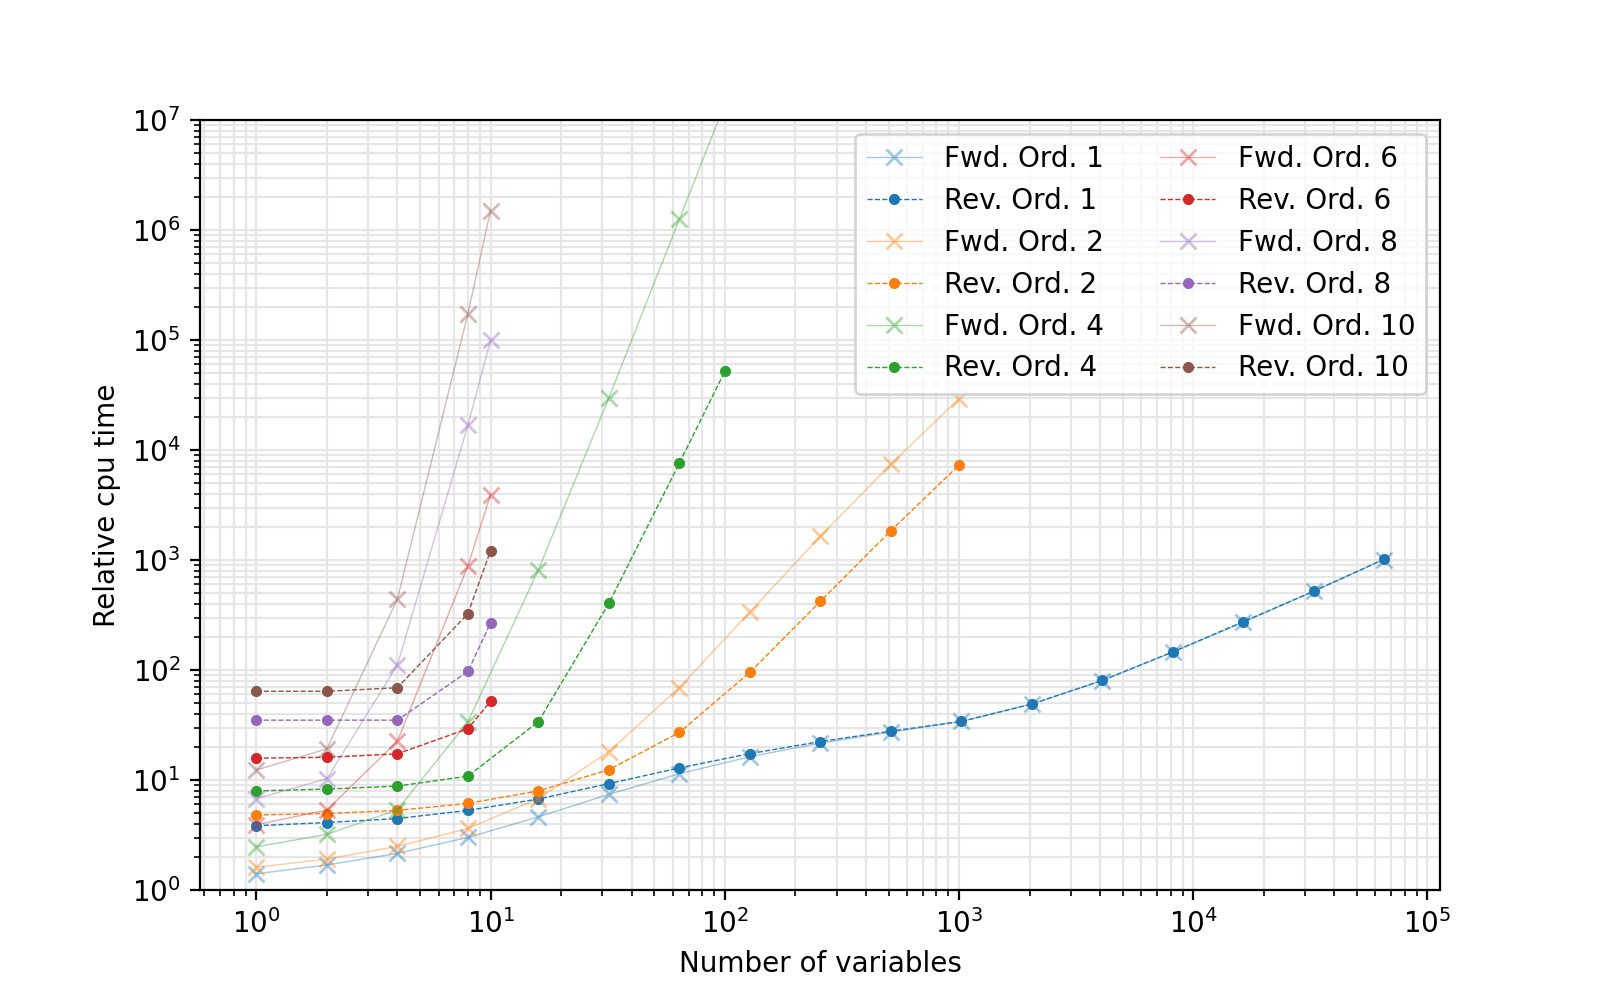

In [7]:
plt.figure(figsize=(8,5))
for i in range(len(orders_evald)):
    
    plt.plot(rel_cputimes_evald[i][0],rel_cputimes_evald[i][1],'x-C'+str(i),lw=0.5,alpha=0.4,label='Fwd. Ord. '+str(orders_evald[i]))
    plt.plot(rel_cputimes_evald[i][0],rel_cputimes_evald[i][2],'.--C'+str(i),lw=0.5,label='Rev. Ord. '+str(orders_evald[i]))

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_axisbelow(True)
plt.grid(color=(0.9,0.9,0.9))
plt.grid(which='minor',color=(0.9,0.9,0.9))
plt.legend(ncol=2)
plt.axis([None, None,1e0,1e7])
plt.ylabel('Relative cpu time')
plt.xlabel('Number of variables')
plt.show()
plt.savefig("Time2Solve.pdf")

<IPython.core.display.Javascript object>


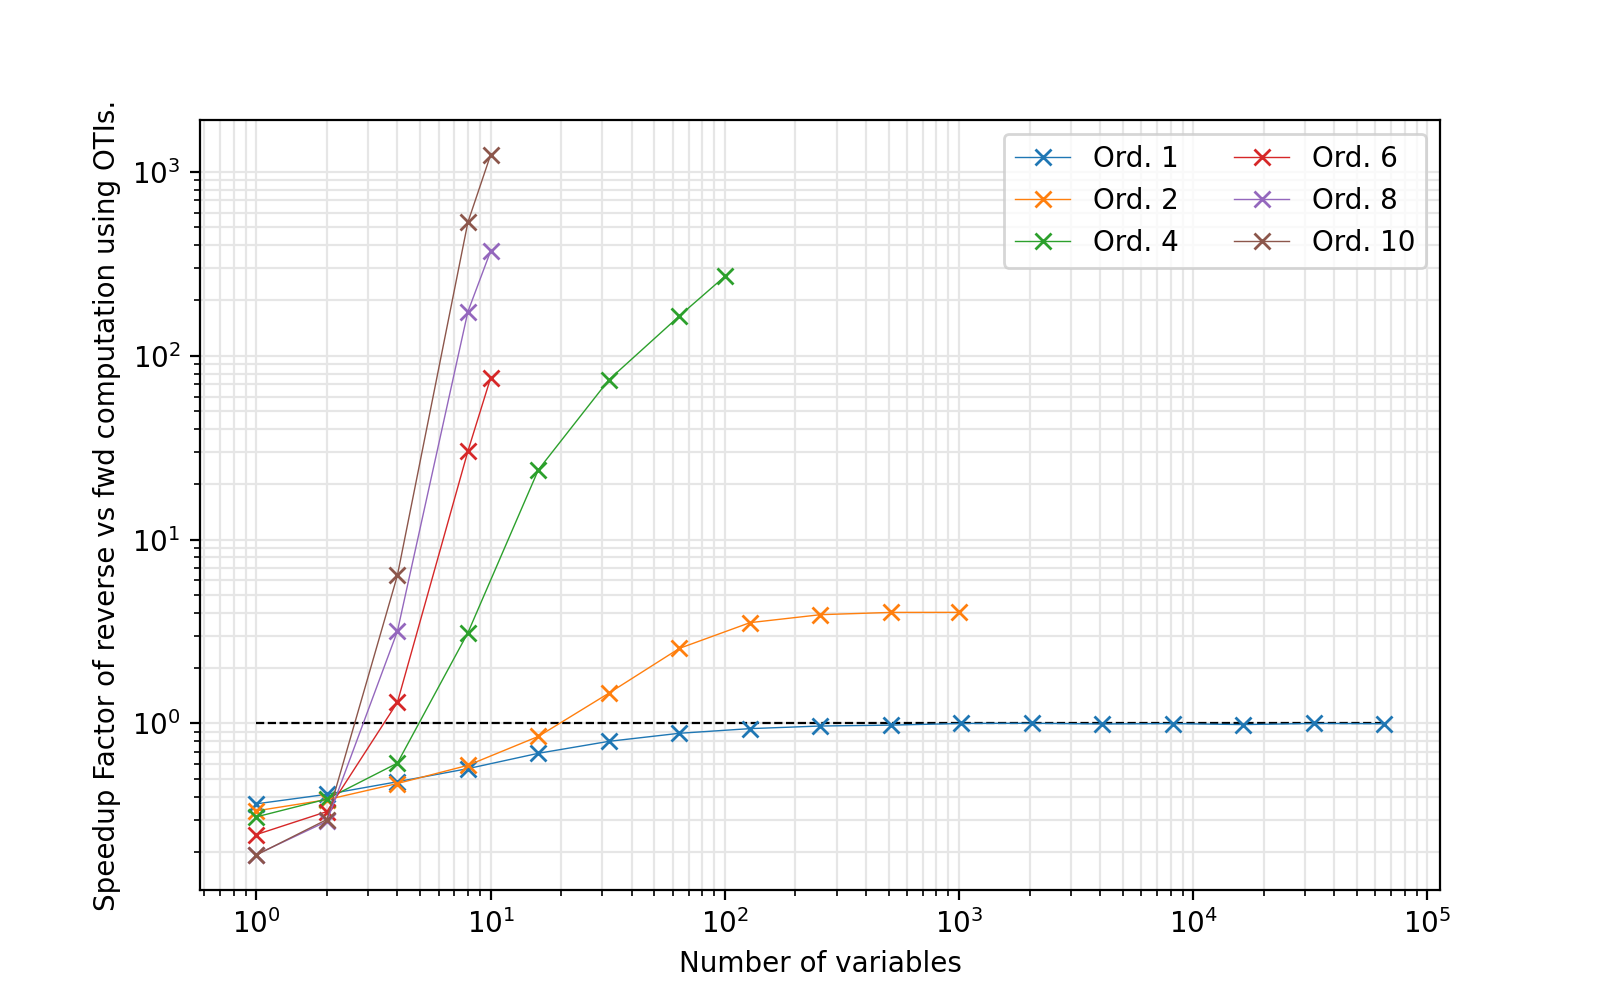

In [8]:
plt.figure(figsize=(8,5))
plt.plot([1,65000],[1,1],'--k',lw=0.8)
for i in range(len(orders_evald)):
    
    plt.plot(rel_cputimes_evald[i][0],rel_cputimes_evald[i][1]/rel_cputimes_evald[i][2],'x-C'+str(i),lw=0.5,alpha=1,label='Ord. '+str(orders_evald[i]))
#     plt.plot(rel_cputimes_evald[i][0],rel_cputimes_evald[i][2],'.--C'+str(i),lw=0.5,label='Rev. Ord. '+str(orders_evald[i]))

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_axisbelow(True)
plt.grid(color=(0.9,0.9,0.9))
plt.grid(which='minor',color=(0.9,0.9,0.9))
plt.legend(ncol=2)
# plt.axis([None, None,1e0,1e7])
plt.ylabel('Speedup Factor of reverse vs fwd computation using OTIs.')
plt.xlabel('Number of variables')
plt.show()
plt.savefig("SpeedupReversevsFwd-HigherOrder.pdf")
